In [1]:
# 이미지 삽입
from IPython.display import Image

In [2]:
Image("../img/img02_01.png",width=800)

FileNotFoundError: No such file or directory: '../img/img02_01.png'

FileNotFoundError: No such file or directory: '../img/img02_01.png'

<IPython.core.display.Image object>

In [3]:
Image("../img/img02_02.png", width=800)

FileNotFoundError: No such file or directory: '../img/img02_02.png'

FileNotFoundError: No such file or directory: '../img/img02_02.png'

<IPython.core.display.Image object>

## 선형 회귀의 주요 가정
- 각 변수는서로독립이며, 타깃변수와선형상관관계를가짐
- 에러e는 서로독립이며, 정규분포의특성을가짐

### 선형 회귀 모델을 사용하여 캘리포니아 주택 데이터에 대해 학습하고, 테스트 세트에서 모델의 성능을 평가하는 과정
> 선형 회귀 모델을 사용하여 주어진 데이터를 학습시키고, 테스트 데이터에 대한 모델의 성능을 결정계수(R^2)로 평가하여 출력합니다. 결정계수는 모델의 예측 정확도를 나타내는 지표

In [4]:
!pip install scikit-learn

## #01.  데이터 가져오기

In [5]:
# 캘리포니아 주택 데이터
from sklearn.datasets import fetch_california_housing
# 모델
from sklearn.model_selection import train_test_split

In [6]:
# 캘리포니아 주택 데이터셋 로드
# data.data: 
# 1. 입력 변수(특징)들의 전체 데이터셋
#    캘리포니아 주택 데이터셋의 경우 각 집에 대한 다양한 특징(예: 인구, 평균 소득 등)이 포함되어 있습니다.)
# 2. data.target: 타겟 값(레이블)들의 전체 데이터셋입니다. 
#    캘리포니아 주택 데이터셋의 경우 각 집의 주택 가격이 타겟 값으로 사용됩니다.
# 3. train_test_split 함수 : sklearn.model_selection 모듈에 포함된 함수로, 데이터를 훈련 세트와 테스트 세트로 나누는 역할을 합니다.
# 4. X_train: 훈련 세트의 입력 변수(특징)들입니다. 전체 데이터셋의 일부로, 모델을 학습시키는 데 사용됩니다.
# 5. X_test: 테스트 세트의 입력 변수(특징)들입니다. 전체 데이터셋의 일부로, 모델의 성능을 평가하는 데 사용됩니다.
# 6. y_train: 훈련 세트의 타겟 값(레이블)들입니다. 모델 학습 시 입력 변수와 함께 사용됩니다.
# 7. y_test: 테스트 세트의 타겟 값(레이블)들입니다. 모델 성능 평가 시 입력 변수와 함께 사용됩니다.
# ** 전체 데이터셋을 훈련 세트와 테스트 세트로 나누어 모델을 학습시키고 평가하는 데 사용합니다. 
#    X_train과 y_train은 모델 학습에 사용되고, X_test와 y_test는 모델 평가에 사용됩니다
data = fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

### 1)데이터의 shape확인

In [7]:
print(data.data.shape, data.target.shape)

(20640, 8) (20640,)


### 2) 클래스 레이블의 실제 이름과 특징

In [8]:
print(data.target_names ,data.feature_names)

['MedHouseVal'] ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## 02. 해당 모델을 학습 및 테스트해서 정확도 구하기

# 
> 모델을 훈련 데이터로 학습시키고, 테스트데이터로 모델의 성능을 평가한다

In [10]:
X_train , X_test, Y_train, Y_test = train_test_split(data.data,data.target, random_state=42)
# 결과 모양 확인
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)
# 결과의 뜻
# X_train shape: (15480, 8)은 훈련 세트에 15,480개의 샘플이 있으며, 각 샘플에는 8개의 특징이 있음을 의미
# X_test shape: (5160, 8)은 테스트 세트에 5,160개의 샘플이 있으며, 각 샘플에는 8개의 특징이 있음을 의미
# y_train shape: (15480,)은 훈련 세트의 타겟 값이 15,480개 있음을 의미(8개중에 하나에 속한다.)
# y_test shape: (5160,)은 테스트 세트의 타겟 값이 5,160개 있음을 의미(8개중에 하나에 속한다.)

X_train shape:  (15480, 8)
X_test shape:  (5160, 8)
Y_train shape:  (15480,)
Y_test shape:  (5160,)


## 예측 모델 : 선형 회귀 모델

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# 선형 회귀 모델 객체 생성
model = LinearRegression()

# 훈련 데이터를 사용하여 선형 회귀 모델을 학습
model.fit(X_train, Y_train)


LinearRegression()


> - 테스트 데이터를 사용하여 모델의 성능을 평가
> - model.score메서드는 결정계수(R^2)를 계산하여 반환
> - 결정계수 값은 모델의 예측이 실제 값에 얼마나 잘 맞는지 나타내는 지표(1에 근사할수록 좋은 성능)

In [13]:
score = model.score(X_test,Y_test)
print("결정계수: {}".format(score))

결정계수: 0.5910509795491352


## 03. 회귀 모델의 평가
### 1) 결정계수 
###   결정계수 R2 는 회귀 분석의 결과를 평가하는 데 사용되는 통계적 지표
- 독립 변수들이 종속 변수의 변동 얼마나 설명하는지를 나타냅니다.  
- 값은 0과 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터에 잘 맞는다는 것을 의미합니다.

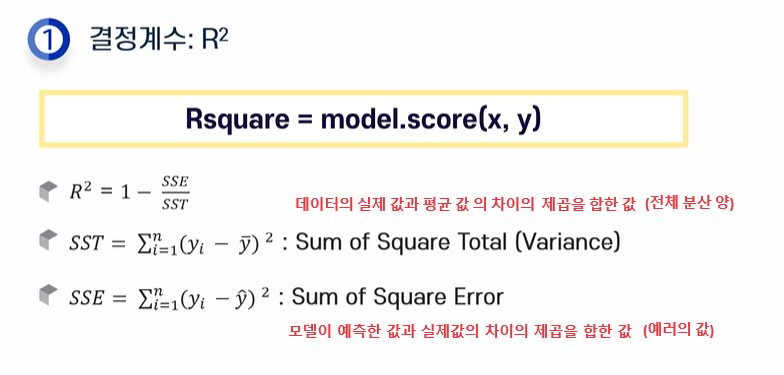

In [14]:
Image("img/img02_04.png",width=800)

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 스케일링
from sklearn.preprocessing import StandardScaler
# 결정계수
from sklearn.metrics import r2_score, mean_absolute_error

In [16]:
california = fetch_california_housing()

# 특성과 타깃 변수를 분리
x,y = california.data, california.target

# 훈련 시키기 위해서 세트 분리
# test_stze =0.2 : 전체 데이터의 20%를 테스트 데이터로 할당하고, 나머지 80% 데이터를 훈련 데이터로 할당
X_train , X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 데이터 정규화(표준화 스케일링)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# 선형 회귀 모델 생성
model =LinearRegression()

# 훈련
model.fit(X_train,Y_train)

# 테스트
Y_pred = model.predict(X_test)

# 결정계수
r2 = r2_score(Y_test,Y_pred)
print("결정계수 : ", r2)


결정계수 :  0.575787706032451


> - MAE값이 잦ㄱ을수록 모델ㄹ의 예측이; 실제값에 가깝다는 의미
> - 예측값이 실제값보다 크게 벗어나는 경우에는 민감하게 반응한다.

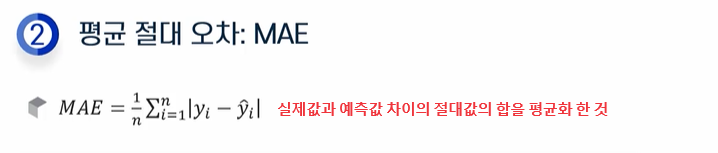

In [17]:
Image('img/img02_05.png', width=800)

In [18]:
# 평균 절대 오차 (MAE) 계산
mae = mean_absolute_error(Y_test, Y_pred)
print("평균 절대 오차 : ", mae)

평균 절대 오차 :  0.5332001304956566


In [19]:
## 교차 검증

## #03. 시각화

> 회귀 분석의 시각화 방법 중 하나는 실제값과 예측값을 비교하는 산점도를 그리는 것이다.<br>
이를 통해 모델이 얼마나 정확하게 예측하는지 시각적으로 평가할 수 있다.

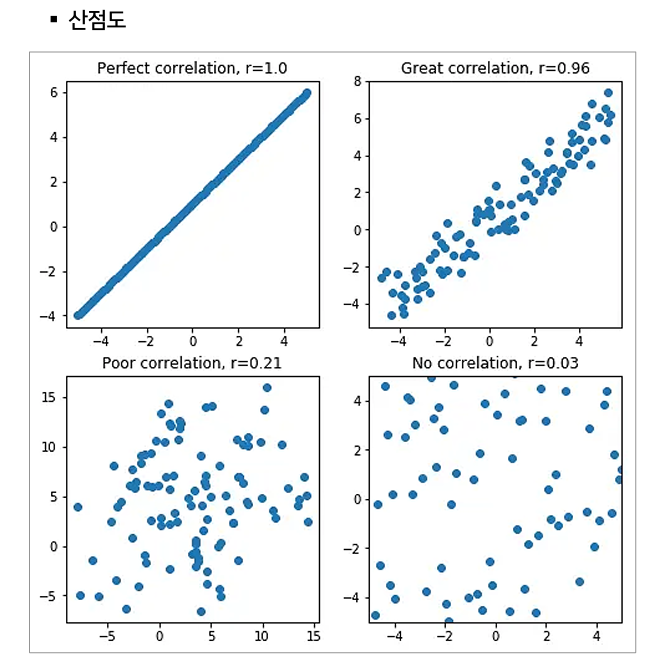

In [20]:
Image("img/img02_06.png")

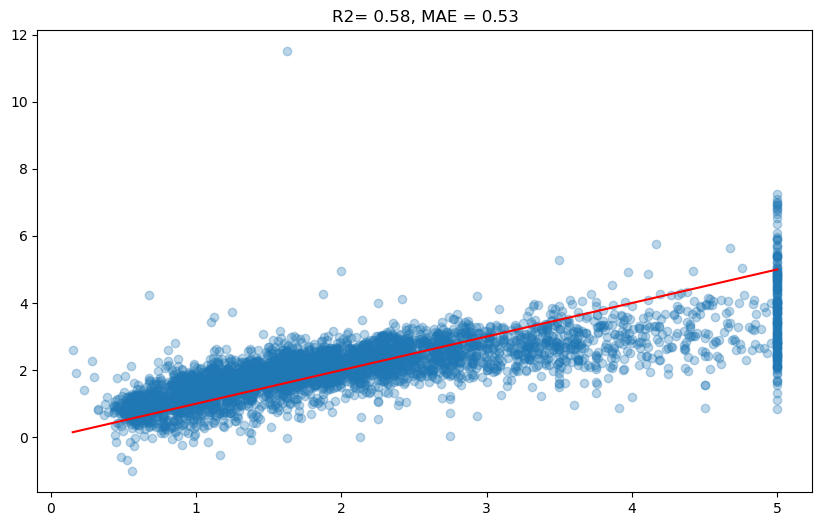

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()], c='r')
plt.title("R2= {0:0.2f}, MAE = {1:.2f}".format(r2,mae))
plt.show()
